Accuracy: 0.96

Confusion Matrix:
[[ 55   1   0   0]
 [  5  54   3   0]
 [  0   4 101   1]
 [  0   0   2 197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.92      0.87      0.89        62
           2       0.95      0.95      0.95       106
           3       0.99      0.99      0.99       199

    accuracy                           0.96       423
   macro avg       0.94      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423



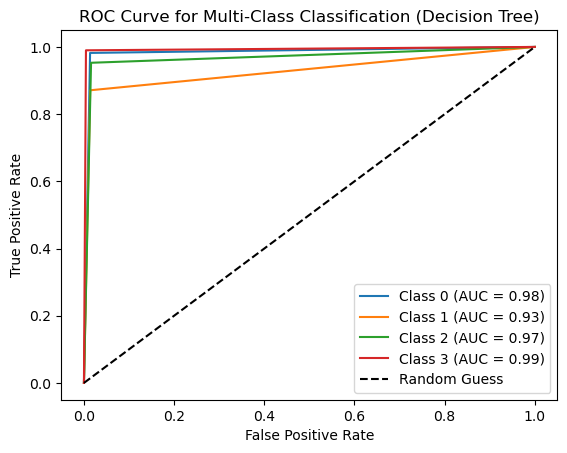

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Step 2: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Step 6: ROC Curve and AUC (for multi-class)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust to your class labels
y_pred_prob = dt_model.predict_proba(X_test)

# Plot ROC Curve
plt.figure()
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification (Decision Tree)")
plt.legend(loc="lower right")
plt.show()
